In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd


print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")


TF version: 2.4.0
Hub version: 0.11.0
GPU available (YESS!!!!)


In [2]:
cd ~/Desktop/sample_project_1/dog-breed-identification

/home/nedjmeddine/Desktop/sample_project_1/dog-breed-identification


In [3]:

labels_csv = pd.read_csv("./labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     369f1231c318aafcdcb56a0cdd63b5f0  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


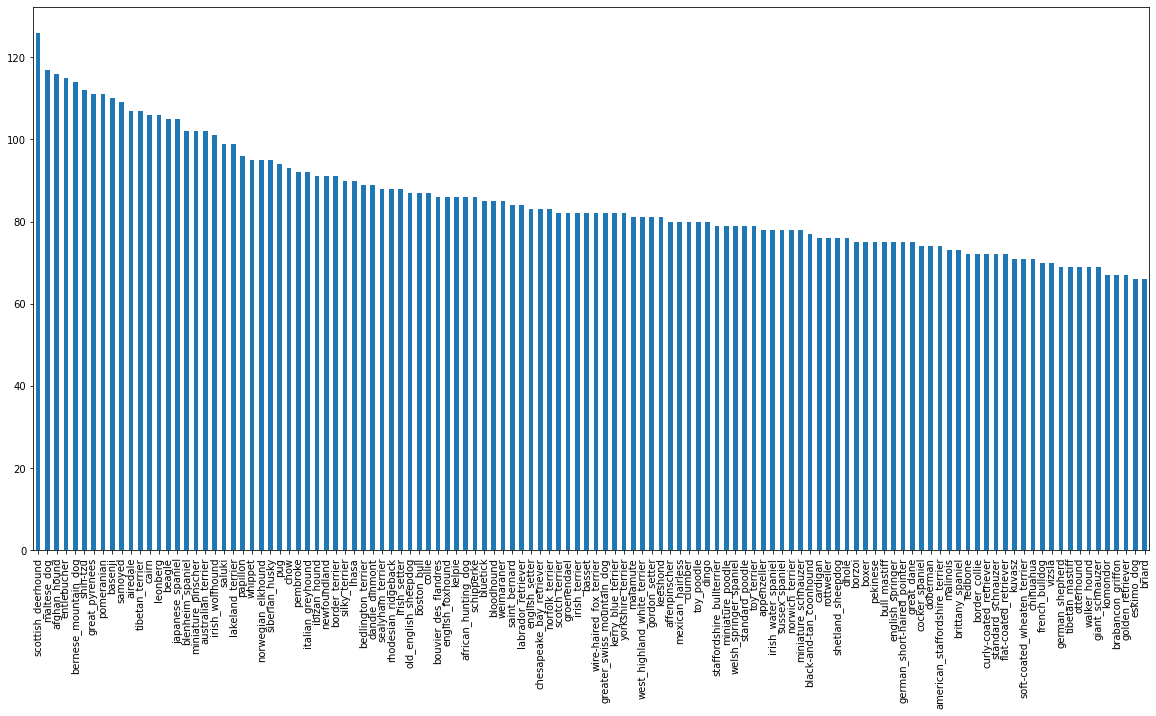

In [4]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

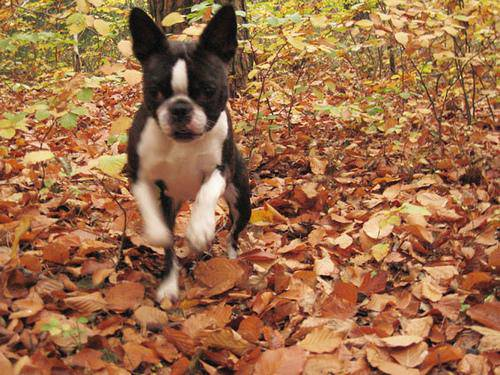

In [5]:
from IPython.display import display, Image
Image("./train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [6]:
# Create pathnames from image ID's
filenames = ["./train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['./train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './train/001cdf01b096e06d78e9e5112d419397.jpg',
 './train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './train/002a283a315af96eaea0e28e7163b21b.jpg',
 './train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("./train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


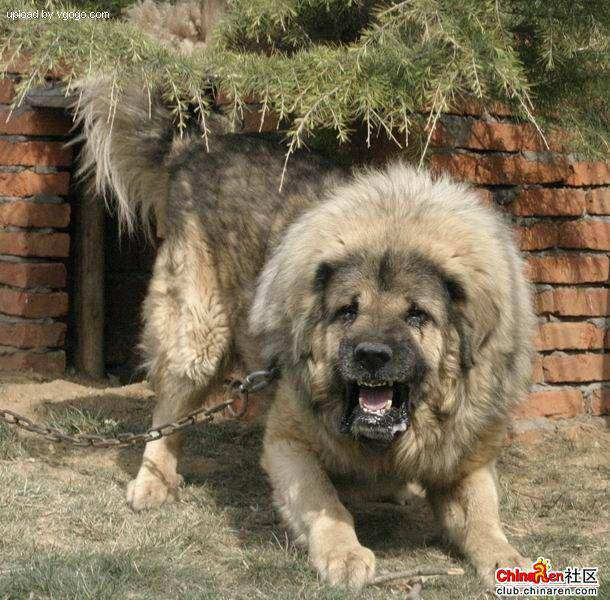

In [8]:
# Check an image directly from a filepath
Image(filenames[9000])

In [9]:
import numpy as np
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [10]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [11]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [12]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [14]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [15]:
# Setup X & y variables
X = filenames
y = boolean_labels

# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [16]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [17]:
# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['./train/00bee065dcec471f26394855c5c2f3de.jpg',
  './train/0d2f9e12a2611d911d91a339074c8154.jpg',
  './train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  './train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  './train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False,

In [18]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [19]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [22]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [23]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [24]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [25]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)


Creating training data batches...
Creating validation data batches...


In [26]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [32]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

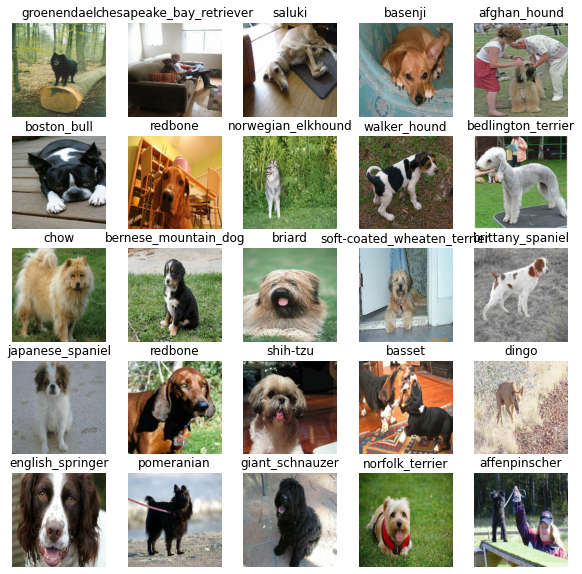

In [33]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

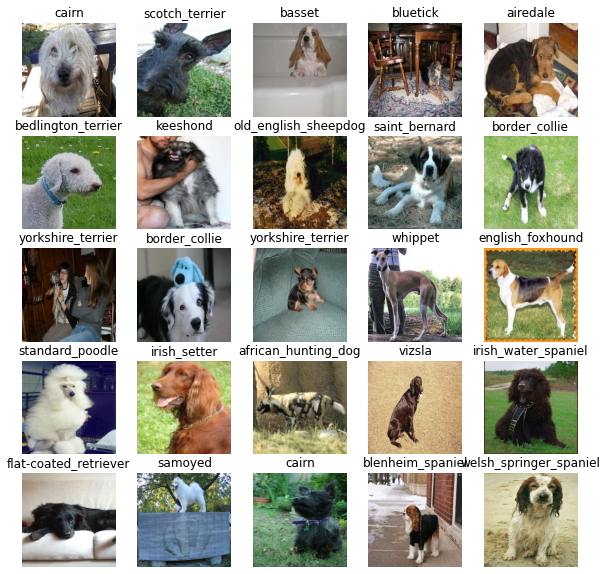

In [36]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [37]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [38]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [39]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [40]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [41]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("./logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [42]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [43]:
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [44]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}


In [45]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [46]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 10s 207ms/step - loss: 5.0633 - accuracy: 0.0370 - val_loss: 3.3198 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 4s 140ms/step - loss: 1.8263 - accuracy: 0.6742 - val_loss: 2.1661 - val_accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 4s 140ms/step - loss: 0.6292 - accuracy: 0.9358 - val_loss: 1.7582 - val_accuracy: 0.5400
Epoch 4/100
25/25 [==============================] - 4s 141ms/step - loss: 0.2638 - accuracy: 0.9881 - val_loss: 1.5420 - val_accuracy: 0.6000
Epoch 5/100
25/25 [==============================] - 4s 140ms/step - loss: 0.1487 - accuracy: 0.9958 - val_loss: 1.4827 - val_accuracy: 0.6150
Epoch 6/100
25/25 [==============================] - 4s 140ms/step - loss: 0.1055 - accuracy: 0.9986 - val_loss: 1.4428 - val_accuracy: 0.6300
Epoch 7/100
25/25 [=============================

In [48]:
%tensorboard --logdir ./logs # 

In [49]:
#Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 1s 113ms/step


array([[7.24422047e-04, 2.64754071e-05, 4.23663674e-04, ...,
        4.16881463e-04, 3.44268956e-05, 4.59936354e-03],
       [9.53761453e-04, 5.40063425e-04, 7.95774683e-02, ...,
        3.61421116e-04, 7.65608333e-04, 4.06766085e-05],
       [5.33867023e-05, 2.93196372e-05, 3.57280283e-06, ...,
        2.30965874e-04, 1.07303085e-05, 9.75977688e-04],
       ...,
       [3.84915529e-06, 5.15123975e-06, 8.83657867e-06, ...,
        2.43833420e-05, 4.80543022e-05, 1.57420407e-04],
       [6.71155332e-03, 1.34619317e-04, 5.29515499e-04, ...,
        2.12731204e-04, 4.75512534e-05, 4.97764582e-03],
       [4.16745461e-04, 4.15266441e-05, 1.17943727e-03, ...,
        4.45835292e-03, 4.79745213e-03, 1.26718704e-04]], dtype=float32)

In [50]:
# Check the shape of predictions
predictions.shape

(200, 120)

In [53]:
# First prediction
print(predictions[2])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[5.33867023e-05 2.93196372e-05 3.57280283e-06 1.79666804e-05
 4.63079457e-04 4.51890446e-05 2.66876246e-04 3.22895800e-03
 8.43449056e-01 6.59997463e-02 3.79760763e-06 1.96477675e-04
 5.61813125e-04 1.37858908e-03 2.33656559e-02 2.55617400e-04
 1.37620940e-04 1.98767710e-04 3.47138371e-06 3.50020709e-04
 8.37357311e-06 4.13284171e-03 5.46821593e-06 5.65373148e-06
 5.42006688e-04 8.85104146e-06 1.04735373e-05 3.47436318e-04
 4.68262215e-06 2.23037467e-04 6.98113308e-06 3.42456333e-04
 8.45778908e-04 4.78681250e-05 3.86415122e-05 3.14818928e-04
 1.51569242e-04 6.57881756e-05 3.82899379e-05 4.33149835e-04
 2.20842590e-03 4.53114262e-05 6.54767849e-04 8.31361831e-06
 3.75151052e-04 1.45549755e-04 7.21110246e-06 3.66888198e-05
 9.03116506e-06 3.19884275e-03 1.31149171e-03 3.85933745e-05
 7.20724274e-05 3.58201614e-05 9.52445771e-06 3.19708459e-04
 4.42188838e-03 1.60247355e-03 1.00082161e-05 9.65775234e-06
 6.26863271e-04 5.50917284e-05 1.49677662e-05 2.54956149e-06
 4.42721532e-04 4.015970

In [54]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]


'cairn'

In [55]:
# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

In [56]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels



In [57]:
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [58]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

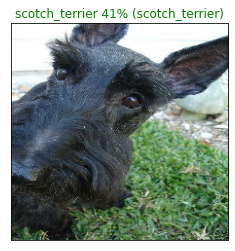

In [65]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images , n=1)

In [63]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

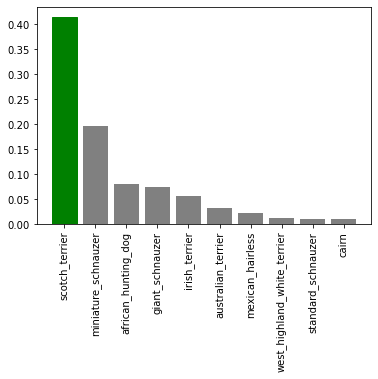

In [66]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=1)

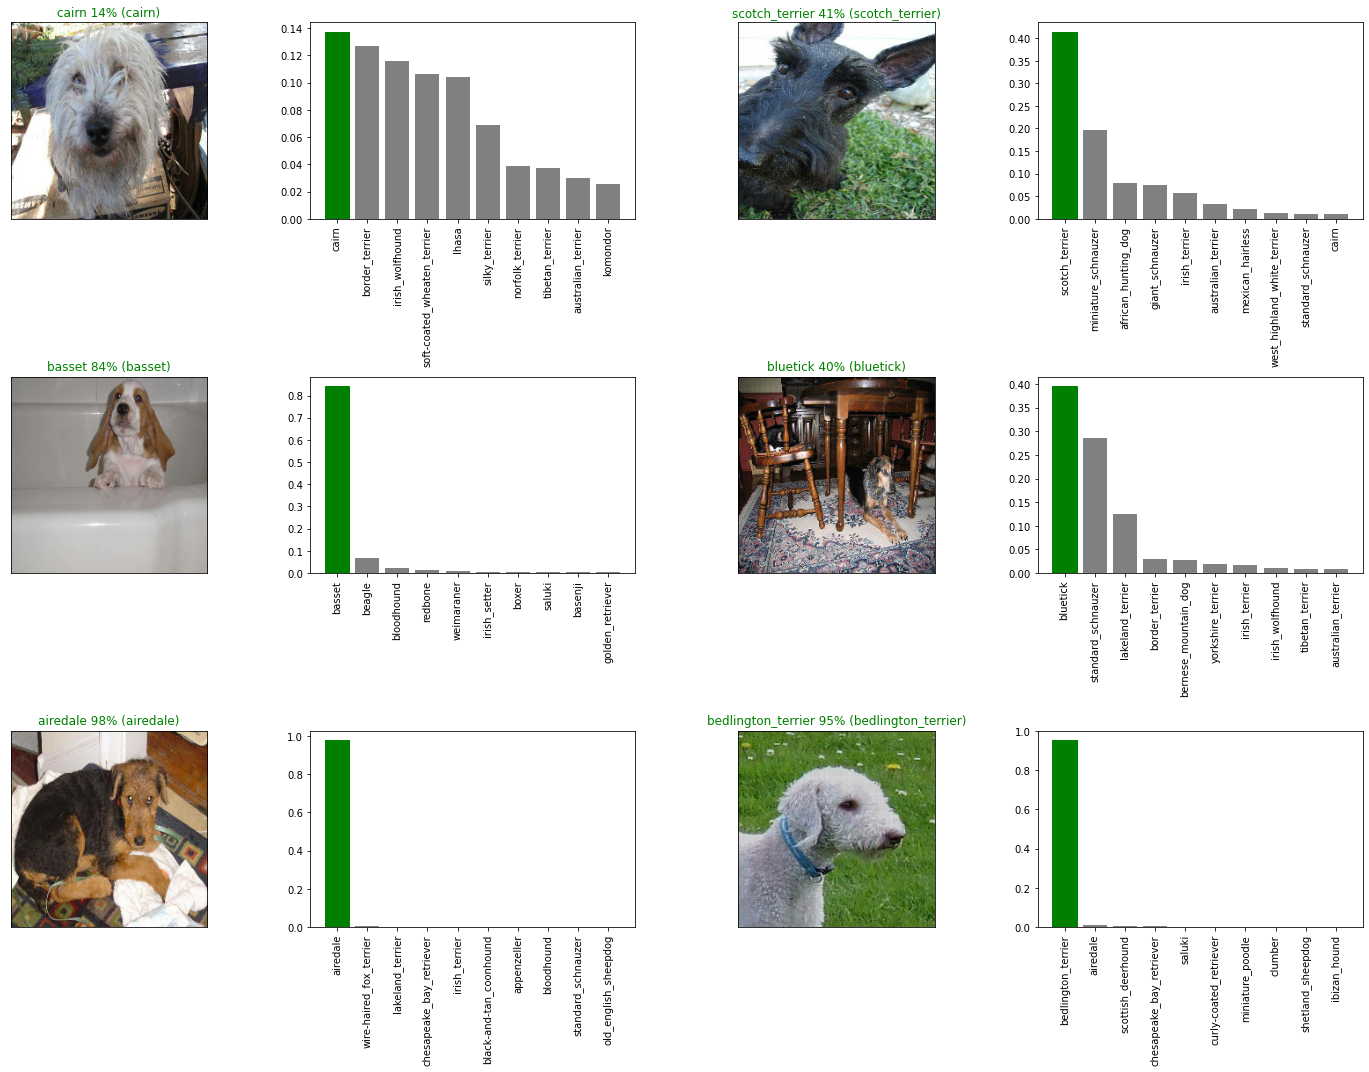

In [67]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [70]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("./models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [71]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [73]:
# Save our model trained on 1000 images
model_path = save_model(model, suffix="1000-images-Adam")

Saving model to: ./models/20210326-07101616739037-1000-images-Adam.h5...


In [74]:
# Load our model trained on 1000 images
model_1000_images = load_model(model_path)

Loading saved model from: ./models/20210326-07101616739037-1000-images-Adam.h5


In [76]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 101ms/step - loss: 1.3199 - accuracy: 0.6600


[1.3198846578598022, 0.6600000262260437]

In [77]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 97ms/step - loss: 1.3199 - accuracy: 0.6600


[1.3198846578598022, 0.6600000262260437]

In [78]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

(10222, 10222)

In [79]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [80]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [81]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [82]:
%tensorboard --logdir ./logs

In [83]:
#Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 38s 111ms/step - loss: 2.3860 - accuracy: 0.4824
Epoch 2/100
320/320 [==============================] - 34s 107ms/step - loss: 0.3832 - accuracy: 0.8923
Epoch 3/100
320/320 [==============================] - 34s 107ms/step - loss: 0.2220 - accuracy: 0.9428
Epoch 4/100
320/320 [==============================] - 34s 107ms/step - loss: 0.1403 - accuracy: 0.9704
Epoch 5/100
320/320 [==============================] - 35s 108ms/step - loss: 0.0927 - accuracy: 0.9835
Epoch 6/100
320/320 [==============================] - 35s 108ms/step - loss: 0.0678 - accuracy: 0.9900
Epoch 7/100
320/320 [==============================] - 35s 108ms/step - loss: 0.0536 - accuracy: 0.9939
Epoch 8/100
320/320 [==============================] - 34s 108ms/step - loss: 0.0430 - accuracy: 0.9952
Epoch 9/100
320/320 [==============================] - 35s 108ms/step - loss: 0.0398 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 35s 108m

In [84]:
# Save our model trained on all the images
full_model_path = save_model(full_model , suffix="All-images-Adam")

Saving model to: ./models/20210326-07371616740640-All-images-Adam.h5...


In [85]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "./test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['./test/9a807493ecf8ba5b7e5cc599b7ae0b53.jpg',
 './test/11e7cf5d0c964af74cb3418f4d1cd082.jpg',
 './test/d2e0317a332e94313bd2875e38e55e34.jpg',
 './test/4793e1b848c7cef0789e131f76e6466a.jpg',
 './test/ab3c567523ef87f50bfb41c1308732af.jpg',
 './test/aba9bba97c5dc5a3f48465d73a4a99e9.jpg',
 './test/7eb470b7b4efcbcdb88cd8a249fbafcf.jpg',
 './test/aaacac53875c392a456e8042c15f5464.jpg',
 './test/8de006e9f9bacefaef962e7d80203925.jpg',
 './test/e07e608afaa89ee4ee939ad0a3bd3224.jpg']

In [86]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [87]:
# Make predictions on test data batch using the loaded full model
test_predictions = full_model.predict(test_data, verbose=1)

324/324 [==============================] - 35s 106ms/step


In [89]:
get_pred_label(test_predictions[9])

'great_pyrenees'

In [92]:
full_model.evaluate(val_data)

7/7 [==============================] - 1s 96ms/step - loss: 0.0047 - accuracy: 1.0000


[0.004733450245112181, 1.0]

In [94]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))

# Append test image ID's to predictions DataFrame
test_path = "./test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions

preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,9a807493ecf8ba5b7e5cc599b7ae0b53,0.000093,0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11e7cf5d0c964af74cb3418f4d1cd082,0.0,0.0,0.0,0.0,0.000003,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00003,0.0,0.0,0.0,0.0,0.0,0.0
2,d2e0317a332e94313bd2875e38e55e34,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0
3,4793e1b848c7cef0789e131f76e6466a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ab3c567523ef87f50bfb41c1308732af,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
preds_df.to_csv("./full_submission_1_mobilienetV2_adam.csv", index=False)